2.1 Create Environment and open the Chrome Dino Game

Opening Chrome Dino...
Waiting for page to load...
Creating environment...
Using input backend: keyboard
Ablation config: {'blur': False, 'hist_eq': False, 'edge_enhance': False, 'temporal_stack': 1, 'obs_resolution': 'default', 'obs_channels': 'grayscale', 'reward_mode': 'sparse', 'reward_scaling': 1.0, 'action_repeat': 1, 'frame_skip': 1, 'noise_level': 0.0, 'brightness_var': 0.0, 'contrast_var': 0.0}
Observation space: (83, 100, 1)
Dino template loaded
Game Over template loaded
Calibrating regions…
Found game region in frame 1: {'top': 387, 'left': 804, 'width': 610, 'height': 200}
Detected game_region: {'top': 387, 'left': 804, 'width': 610, 'height': 200}


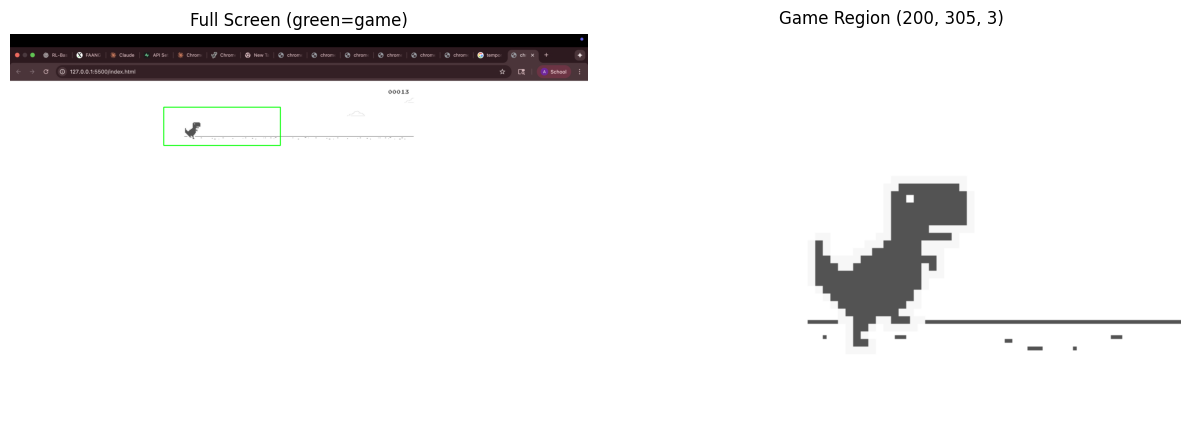

Testing environment...
Calibrating regions…
Found game region in frame 1: {'top': 387, 'left': 804, 'width': 610, 'height': 200}
Observation shape: (83, 100, 1), type: uint8
Step 1: action=1, reward=1.0, done=False
Step 2: action=1, reward=1.0, done=False
Step 3: action=1, reward=1.0, done=False
Step 4: action=1, reward=1.0, done=False
Step 5: action=0, reward=1.0, done=False
Step 6: action=0, reward=1.0, done=False
Step 7: action=2, reward=1.0, done=False
Step 8: action=1, reward=1.0, done=False
Step 9: action=0, reward=1.0, done=False
Step 10: action=0, reward=1.0, done=False
[TERMINATION] Pixel diff game over detected at step 11 (diff=0)
Step 11: action=2, reward=-10.0, done=True
Game over detected!
Test complete!


In [1]:
import os, time, subprocess
import cv2
import matplotlib.pyplot as plt
from envs.chrome_dino_env import ChromeDinoEnv

# 1) Open Chrome Dino
print("Opening Chrome Dino...")
try:
    # subprocess.run(["open", "-a", "Google Chrome", "chrome://dino/"], check=True)
    import webbrowser
    webbrowser.open("http://127.0.0.1:5500/index.html")  # Local server URL
except Exception:
    import webbrowser
    webbrowser.open("https://chromedino.com")

print("Waiting for page to load...")
time.sleep(4.0)

# 2) Create environment
print("Creating environment...")
env = ChromeDinoEnv(auto_calibrate=True, monitor_index=1)

print(f"Detected game_region: {env.game_region}")

# 4) Show debug view
env.debug_show_regions()

# 5) Test basic functionality
print("Testing environment...")
obs, info = env.reset()
print(f"Observation shape: {obs.shape}, type: {obs.dtype}")


# Take a few random actions
for i in range(20):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: action={action}, reward={reward}, done={done}")
    if done:
        print("Game over detected!")
        break

env.close()
print("Test complete!")

In [2]:
# # scripts/snap_region.py
# import os, time, argparse
# from envs.chrome_dino_env import ChromeDinoEnv
# import webbrowser
# def main():
#     # ap = argparse.ArgumentParser()
#     # ap.add_argument("--out", default="logs/snapshots")
#     # ap.add_argument("--monitor_index", type=int, default=0)
#     # ap.add_argument("--auto_calibrate", type=bool, default=True)
#     # args = ap.parse_args()
#     out = "logs/snapshots"
#     os.makedirs(out, exist_ok=True)
#     webbrowser.open("http://127.0.0.1:5500/index.html")
#     env = ChromeDinoEnv(
#         auto_calibrate=True,
#         monitor_index=0,
#         debug_dump_dir="logs/snapshots",       # <<— will trigger one-shot save
#         debug_dump_once=True,
#         debug_tag="snap"
#     )
#     env.reset()
#     # tiny wait so calibration can finish capturing
#     time.sleep(0.5)
#     # 4) Show debug view
#     env.debug_show_regions()
#     env.close()
#     print(f"Snapshot saved under: {os.path.abspath(out)}")

# if __name__ == "__main__":
#     main()
